# This is my data project
## this is smaller title
### this is even smaller
this is text

# Data Audit
Why was it collected?: Netflix
Who paid for it?: Netflix
Where did you get it from?: Netflix

`imports`, I've seen this before!

In [119]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from collections import defaultdict

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [120]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [121]:
plt.rcParams["figure.figsize"] = (10, 5)


In [122]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


The following checks to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.

In [123]:
if os.path.isfile("all-weeks-countries.csv"):
    filepath = "all-weeks-countries.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/datasets/dhruvildave/netflix-top-10-tv-shows-and-films?resource=download&select=all-weeks-countries.csv"
    print("loading from the internet")

netflix_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [165]:
netflix_data.iloc[0]

country_name                            Argentina
country_iso2                                   AR
week                          2022-08-21 00:00:00
category                                    Films
weekly_rank                                     1
show_title                         Look Both Ways
season_title                                  NaN
cumulative_weeks_in_top_10                      1
Name: 0, dtype: object

In [125]:
netflix_data.head() #gives the top 5 rows

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2
2,Argentina,AR,2022-08-21,Films,3,Bank Robbers: The Last Great Heist,NaN,2
3,Argentina,AR,2022-08-21,Films,4,The Next 365 Days,NaN,1
4,Argentina,AR,2022-08-21,Films,5,The Angry Birds Movie 2,NaN,1


The .value_counts() will create a series, where (using below as an example), index is the show name and value is the numerical value assigned ot the show name

In [126]:
count_of_shows=netflix_data["show_title"].value_counts() 
count_of_shows

show_title
Stranger Things                           3119
The Good Doctor                           1759
Money Heist                               1642
Manifest                                  1482
Squid Game                                1202
                                          ... 
Zero Dark Thirty                             1
Son of the Mask                              1
Oprah + Viola: A Netflix Special Event       1
No Good Deed                                 1
Glitch                                       1
Name: count, Length: 3459, dtype: int64

<Axes: xlabel='show_title'>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 

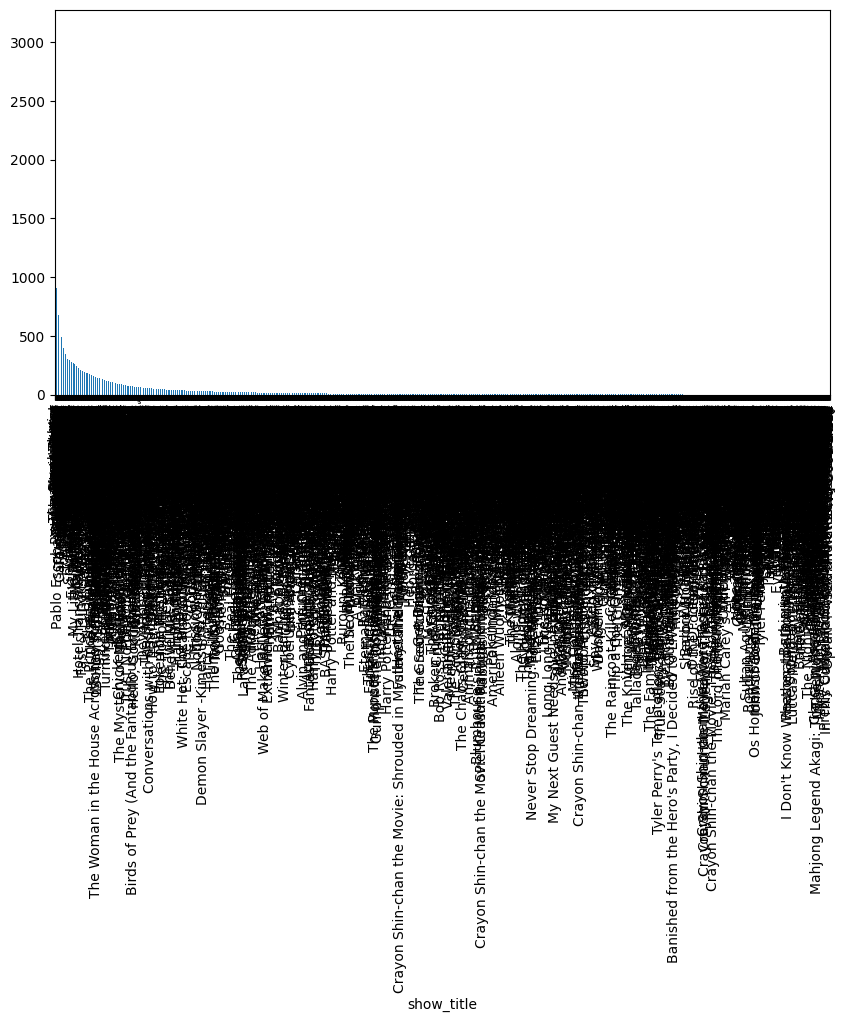

In [127]:
count_of_shows.plot(kind="bar")

the below only plots the tv shows that show up for a specific number of times

<Axes: ylabel='show_title'>

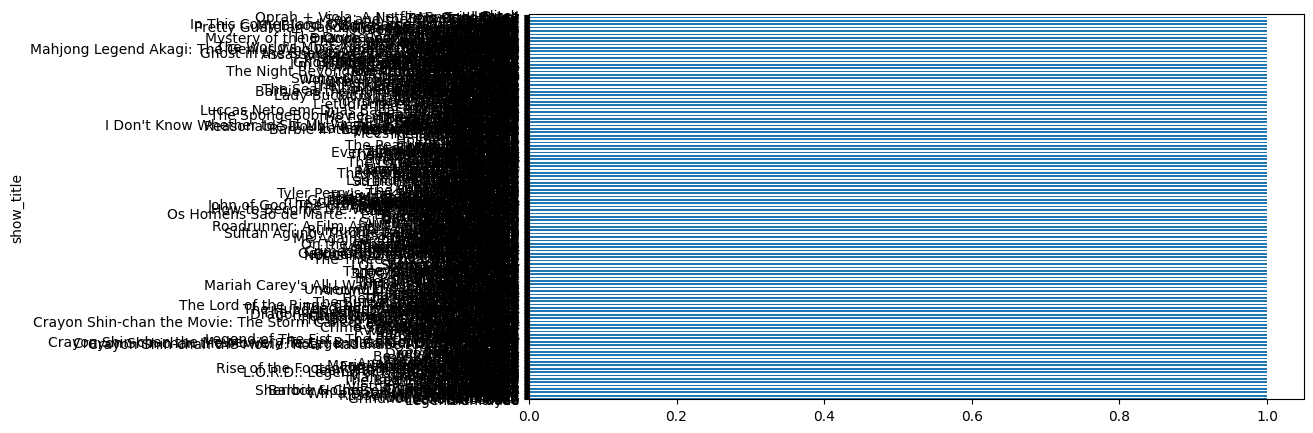

In [128]:
count_of_shows[count_of_shows ==1].plot(kind="barh")

the below code creates the same horizontal bar graph

<BarContainer object of 656 artists>

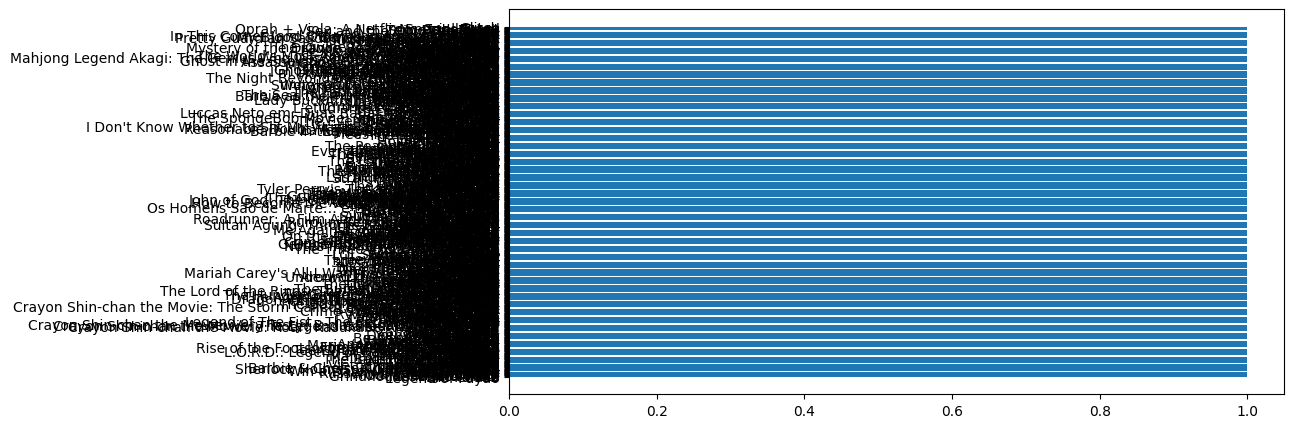

In [129]:
plt.barh(count_of_shows[count_of_shows==1].index,count_of_shows[count_of_shows==1].values)

The below kinda parses the dates so that the code recognises the date in the column "week"

In [130]:
netflix_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["week"],
)
netflix_data.head(2)


/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21753/3425564230.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  netflix_data = pd.read_csv(


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-08-21,Films,1,Look Both Ways,NaN,1
1,Argentina,AR,2022-08-21,Films,2,Day Shift,NaN,2


Then it finds the max and min date

In [131]:
first_date = netflix_data.week.min()
last_date = netflix_data.week.max()
f"range is: {first_date} to {last_date}"


'range is: 2021-07-04 00:00:00 to 2022-08-21 00:00:00'

This makes it much more readable 

In [132]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(first_date, date_format_pattern)
latest_date = datetime.strftime(last_date, date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2021 to August, 2022'

The below(first line) shows how to filter the data to make a graph

<BarContainer object of 40 artists>

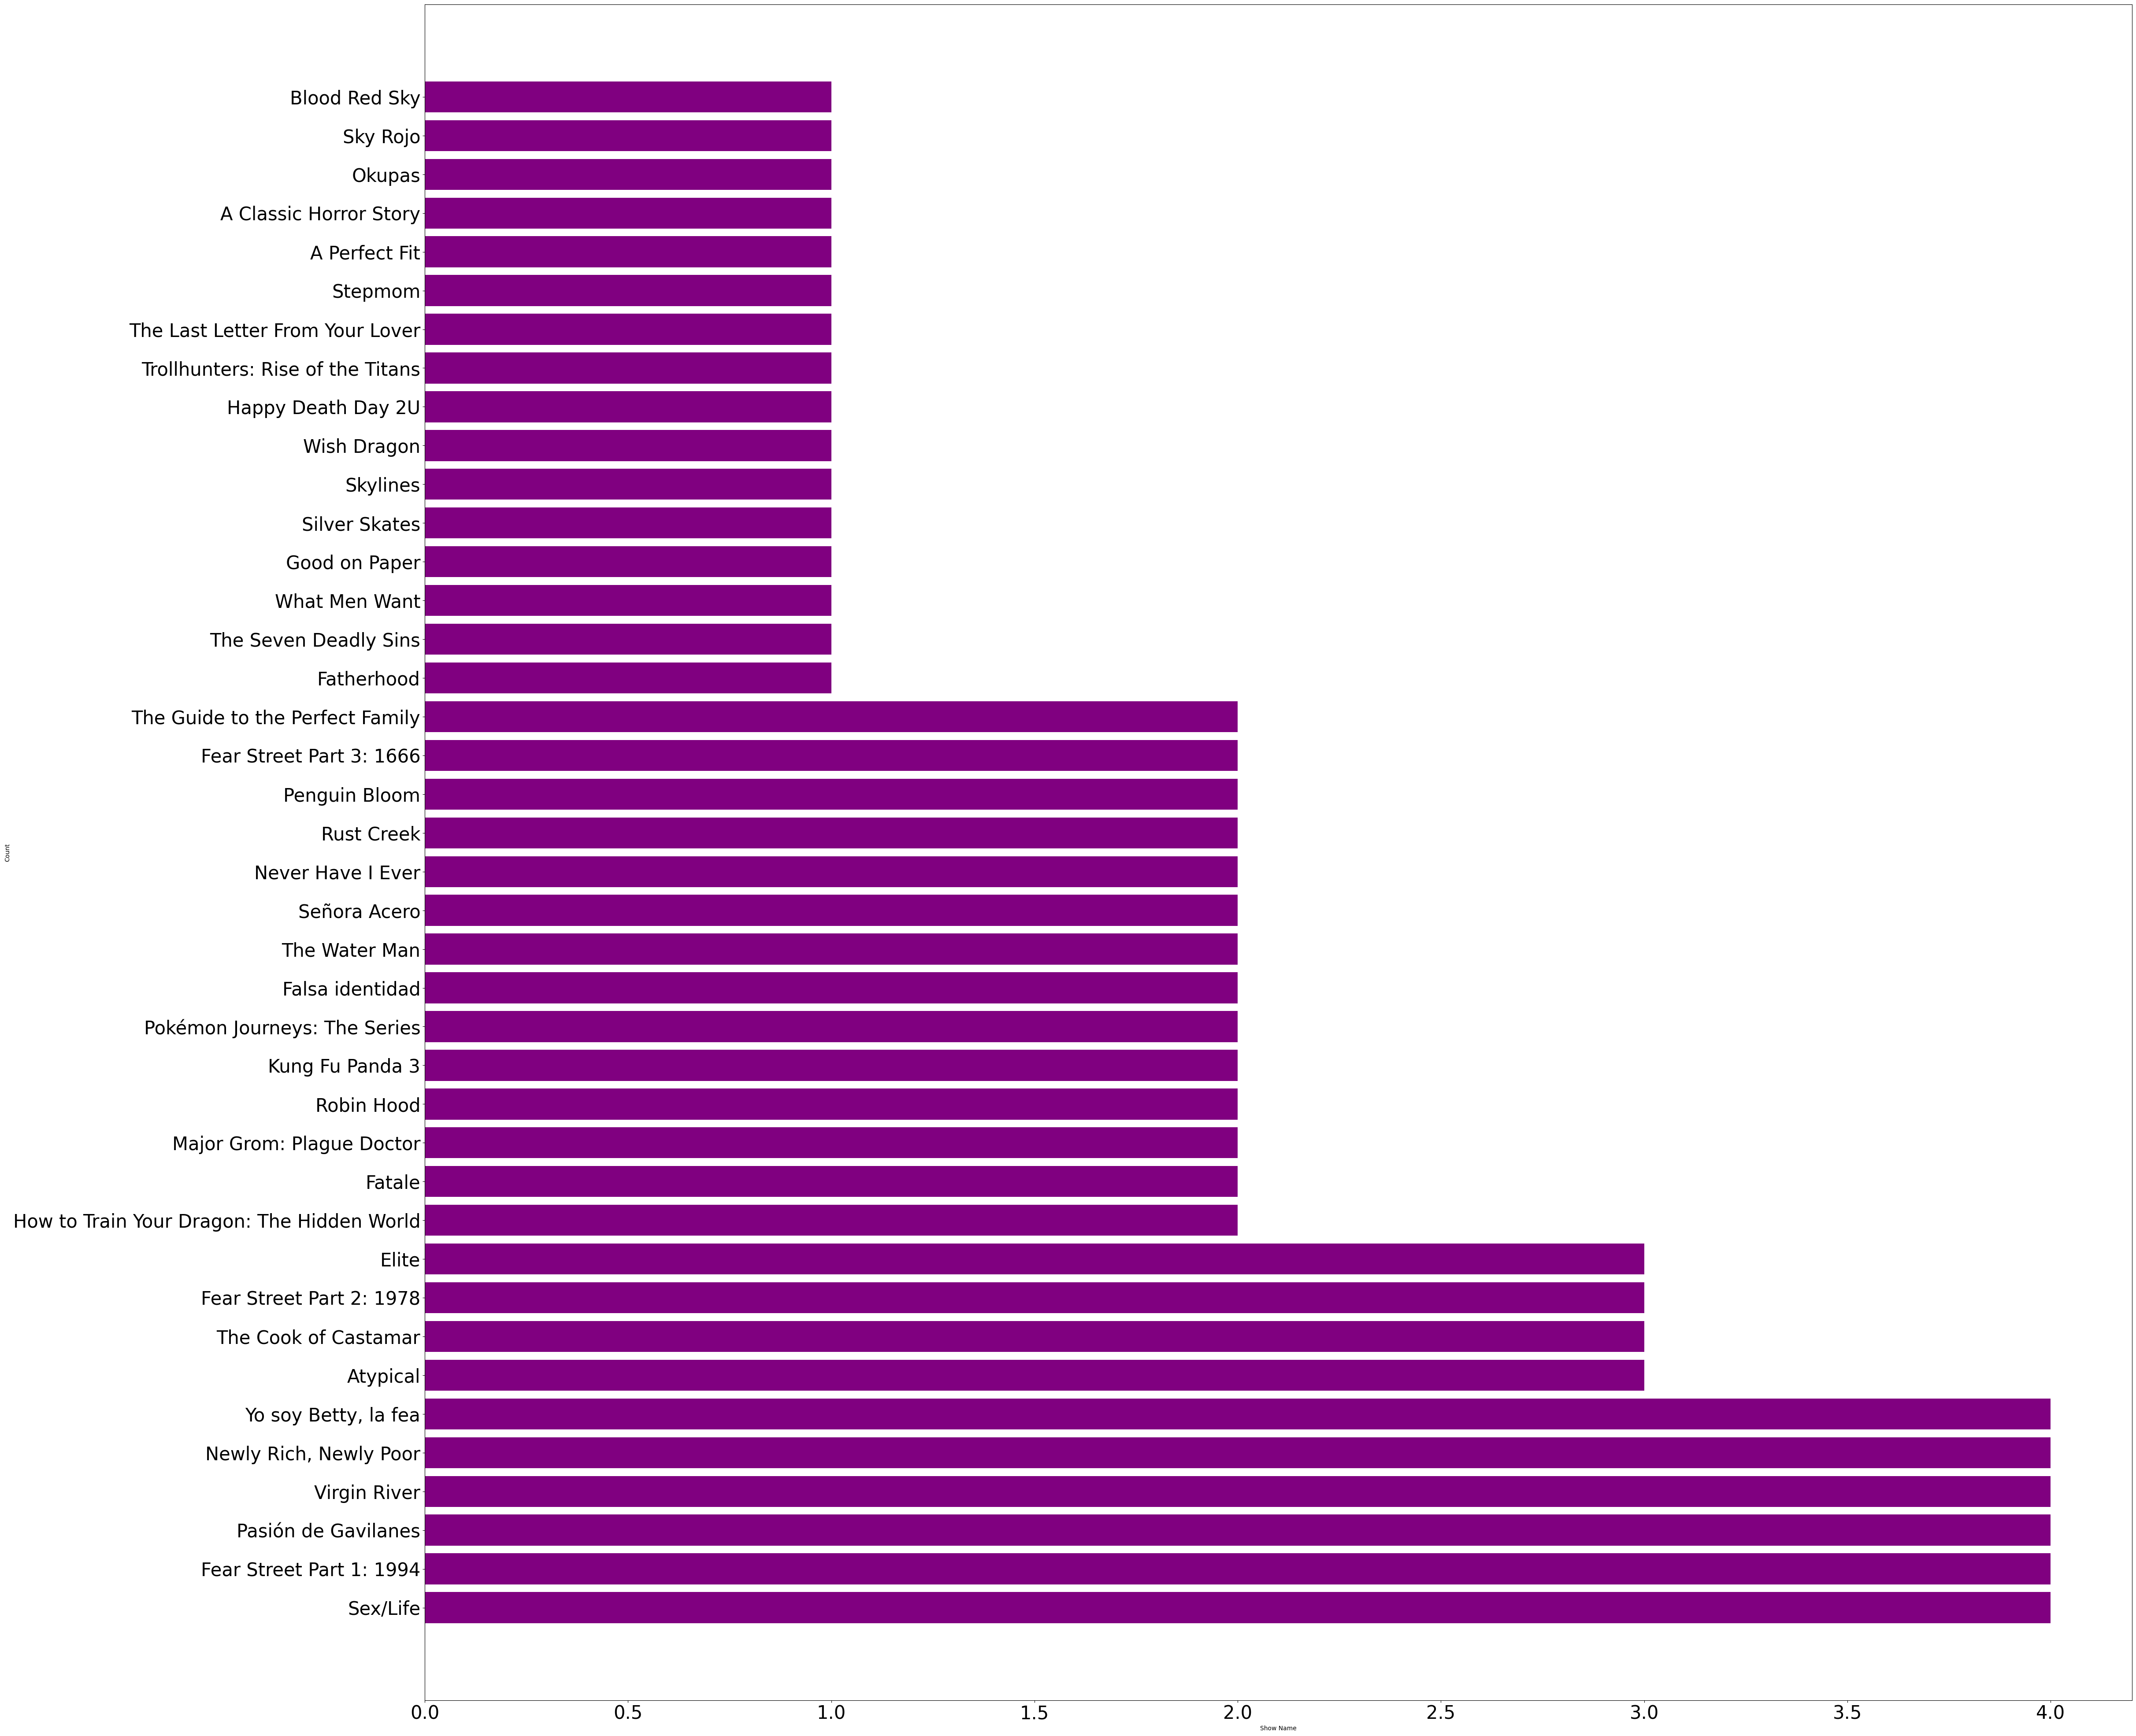

In [133]:
filtered_data = netflix_data[(netflix_data['week'] <="2021-07-30") & (netflix_data['week'] >="2021-07-04")&(netflix_data['country_name']=="Argentina")]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(50, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)  
plt.barh(show_counts.index, show_counts.values, color='purple')

<BarContainer object of 45 artists>

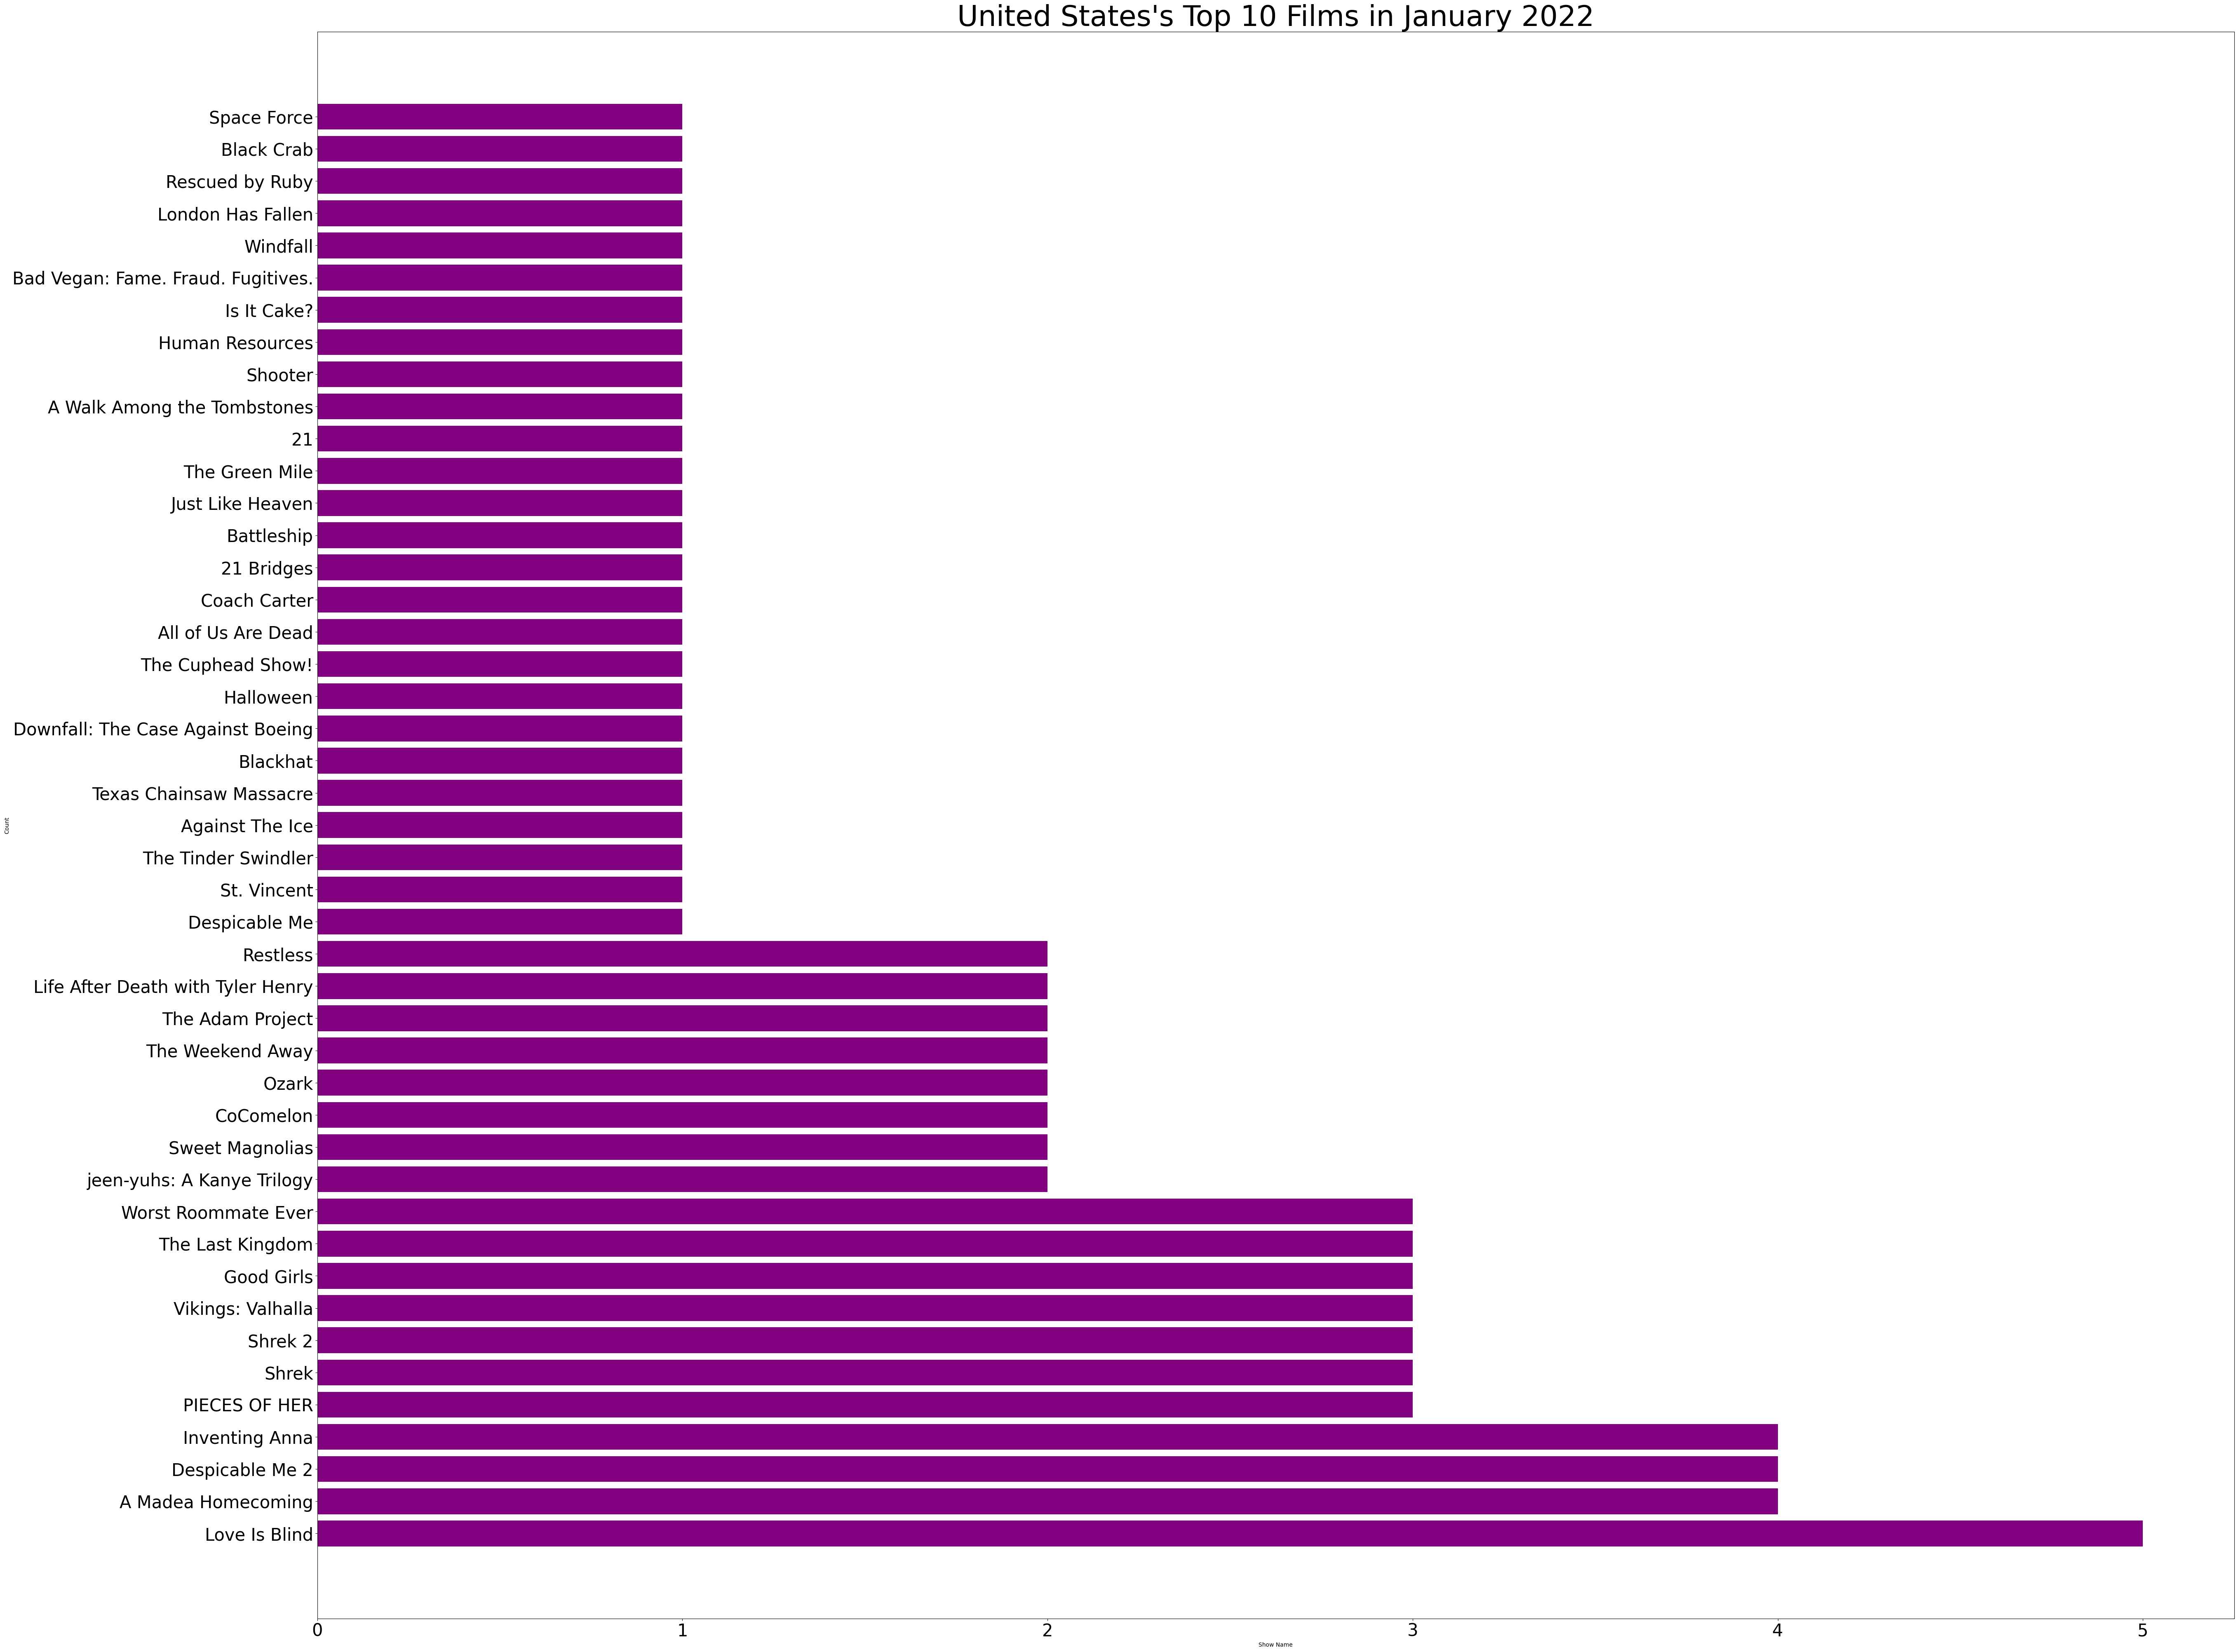

In [134]:
country= 'United States'
filtered_data = netflix_data[(netflix_data['week'] <"2022-03-27") & (netflix_data['week'] >="2022-02-27")&(netflix_data['country_name']==country)]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(60, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title(label=f"{country}'s Top 10 Films in January 2022", fontsize=50)  
plt.barh(show_counts.index, show_counts.values, color='purple')

<BarContainer object of 50 artists>

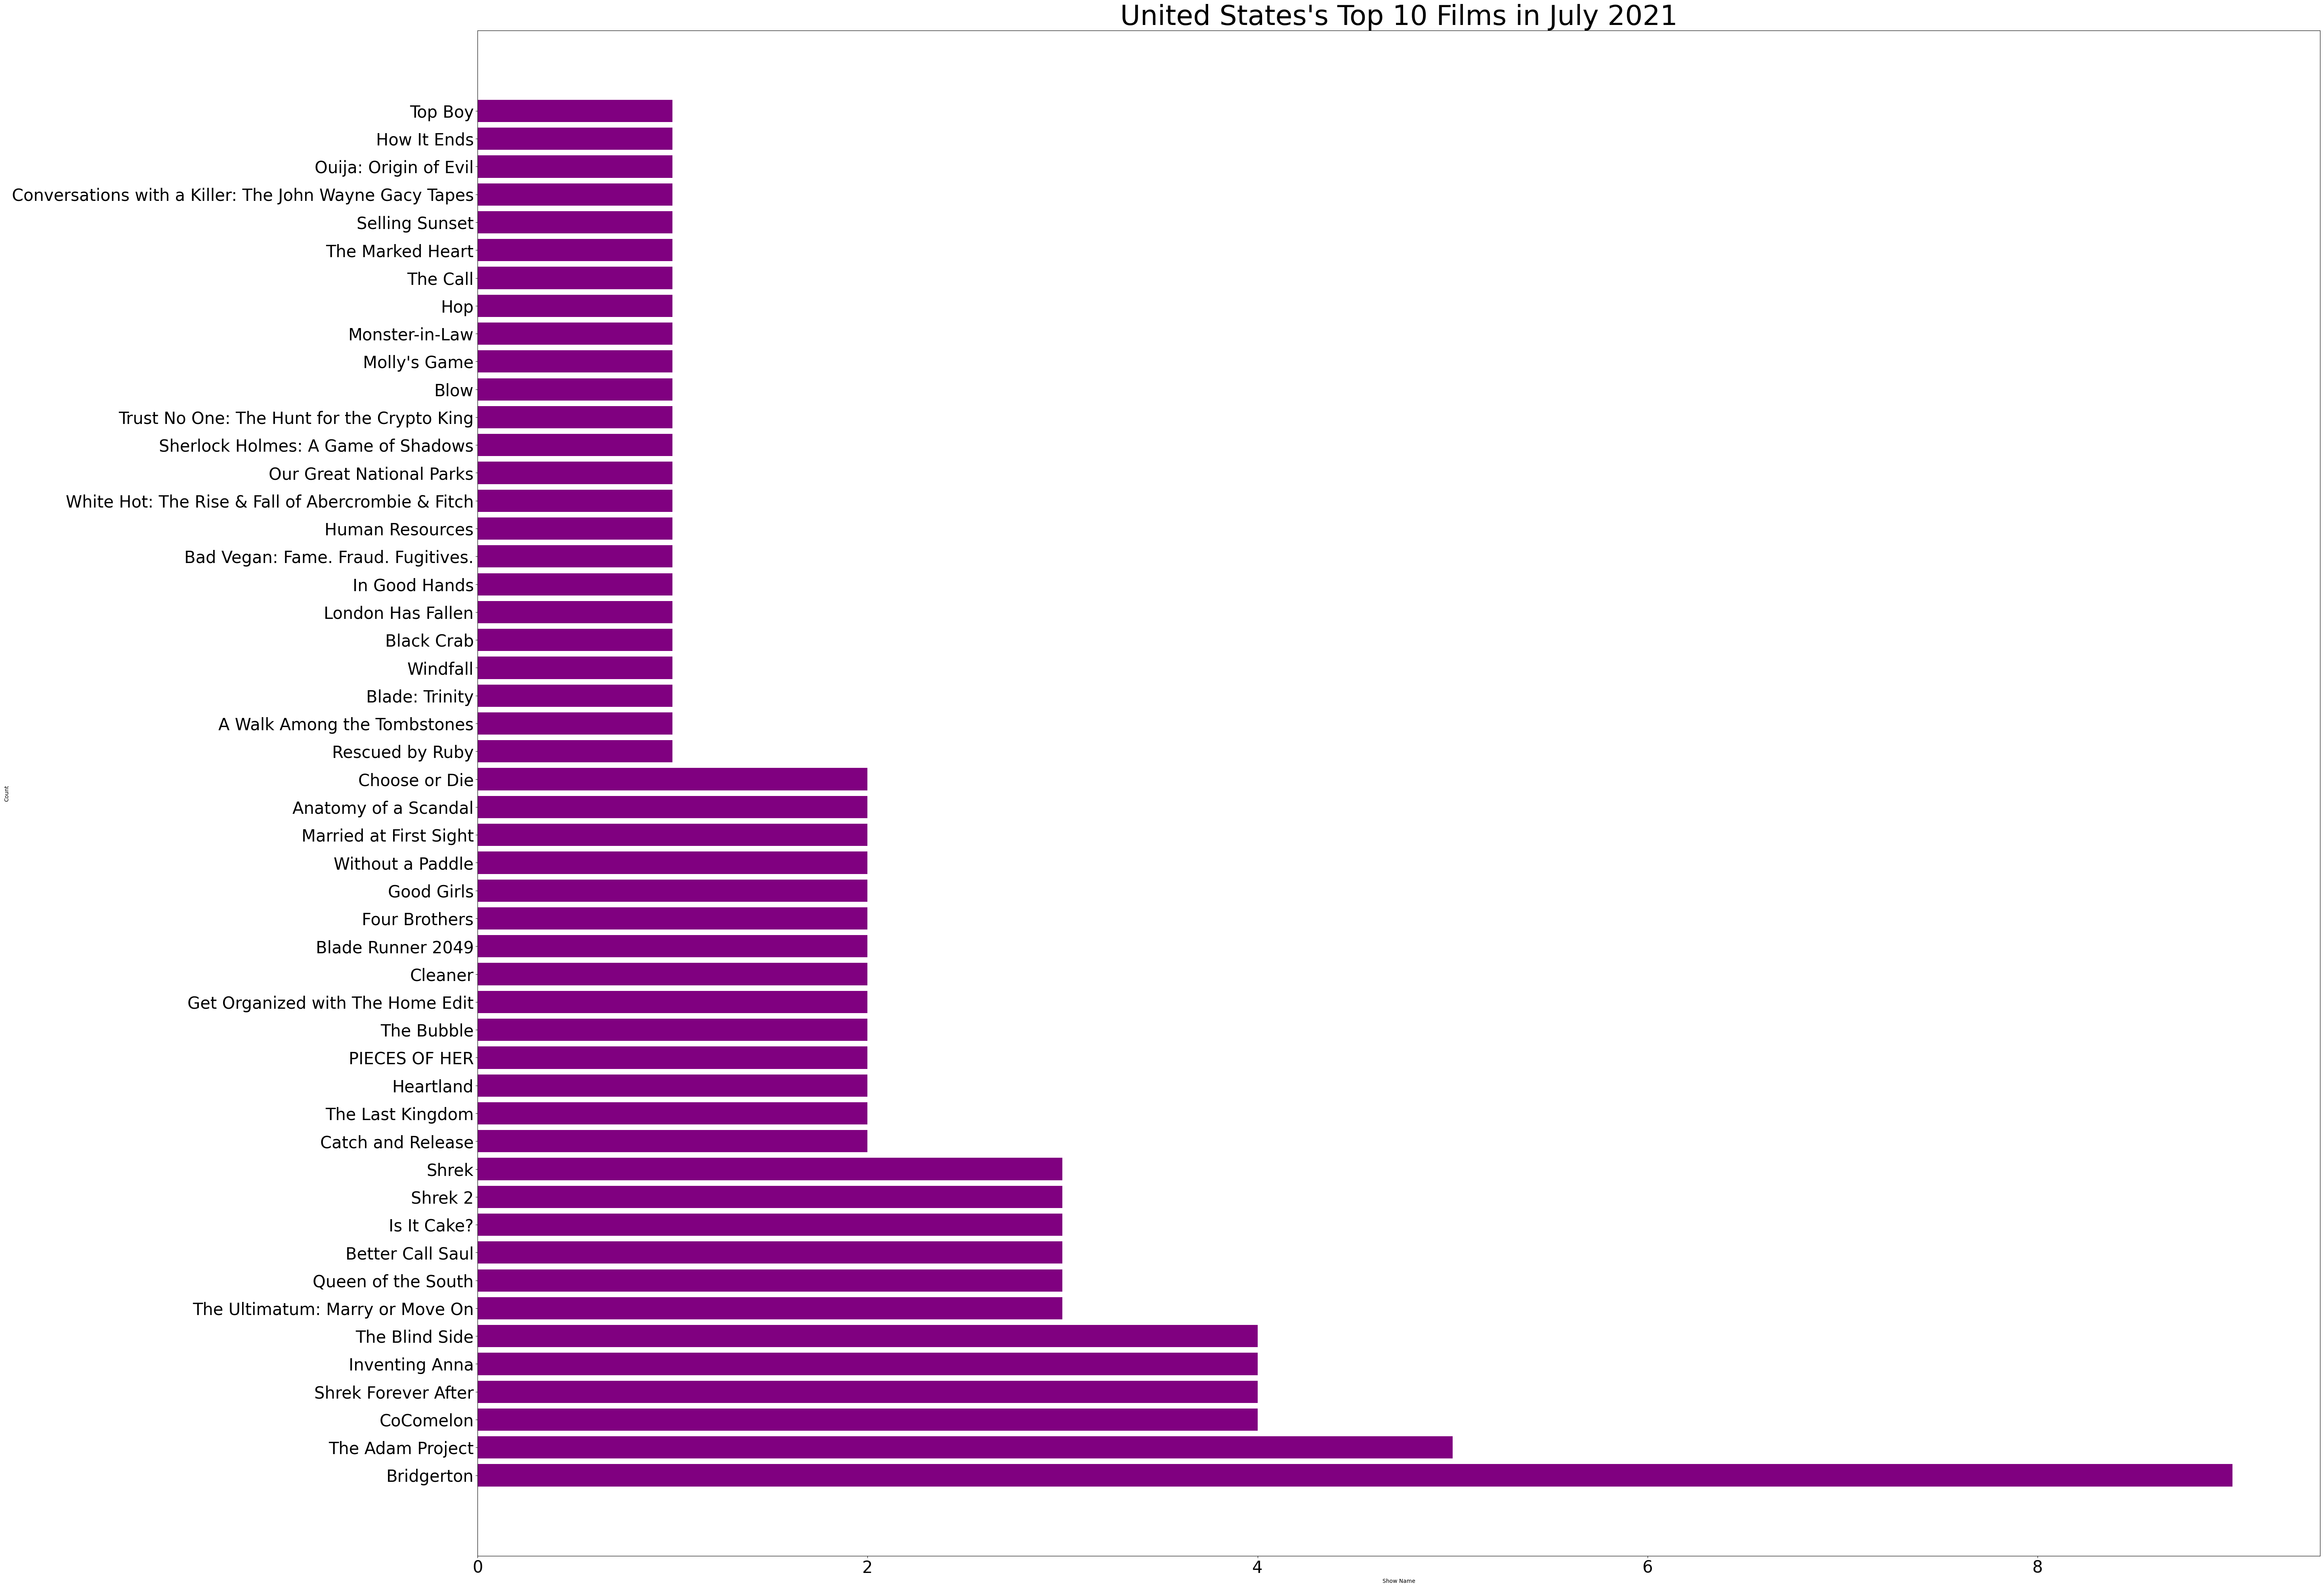

In [135]:
country= 'United States'
filtered_data = netflix_data[(netflix_data['week'] <="2022-04-27") & (netflix_data['week'] >="2022-03-27")&(netflix_data['country_name']==country)]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(60, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title(label=f"{country}'s Top 10 Films in July 2021", fontsize=50)  
plt.barh(show_counts.index, show_counts.values, color='purple')

# GROUPBY

In [136]:
for name, df in netflix_data.groupby("country_name"):
#netflix_data.groupby("country_name") creates a grouped object where netflix_data is split into groups based on unique values in the "country_name" column.
#The for name, df in ... part iterates over each group produced by groupby("country_name").
# name represents the unique value from the "country_name" column that defines the current group.
# df represents only the rows where "country_name" matches name.
    popular=df[df.cumulative_weeks_in_top_10>=52] #filters the dataframe to select rows where the "cumulative_weeks_in_top_10" column has values greater than 45.
    if popular.shape[0]: #shape[0] gives the number of rows, in this context it checks if popular has any rows
        titles = popular.show_title.unique() #Retrieves unique values from the 'show_title' column of the popular DataFrame.
        print(name, df.shape, titles, len(titles))
        #df.shape: Shape of the original DataFrame subset (df), which includes the number of rows and columns.
        #len(titles): Number of unique show titles in popular
        #print(popular[["show_title","cumulative_weeks_in_top_10"]])
        

Argentina (1200, 8) ['Pasión de Gavilanes'] 1
Bolivia (1200, 8) ['Pasión de Gavilanes' 'Yo soy Betty, la fea'] 2
Chile (1200, 8) ['Yo soy Betty, la fea'] 1
Colombia (1200, 8) ['Pablo Escobar, el patrón del mal' 'Yo soy Betty, la fea'] 2
Costa Rica (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Dominican Republic (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'] 2
Ecuador (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
El Salvador (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Guatemala (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Honduras (1200, 8) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Japan (1200, 8) ['Itaewon Class' 'Crash Landing on You'] 2
Mexico (1200, 8) ['Yo soy Betty, la fea'] 1
Nicaragua (1200, 8) ['Pasión de Gavilanes' 'P

In [137]:
for week, row in netflix_data.groupby("week"):
    popular=row[row.cumulative_weeks_in_top_10==37]
    print(week, popular.show_title.unique())

2021-07-04 00:00:00 []
2021-07-11 00:00:00 []
2021-07-18 00:00:00 []
2021-07-25 00:00:00 []
2021-08-01 00:00:00 []
2021-08-08 00:00:00 []
2021-08-15 00:00:00 []
2021-08-22 00:00:00 []
2021-08-29 00:00:00 []
2021-09-05 00:00:00 []
2021-09-12 00:00:00 []
2021-09-19 00:00:00 []
2021-09-26 00:00:00 []
2021-10-03 00:00:00 []
2021-10-10 00:00:00 []
2021-10-17 00:00:00 []
2021-10-24 00:00:00 []
2021-10-31 00:00:00 []
2021-11-07 00:00:00 []
2021-11-14 00:00:00 []
2021-11-21 00:00:00 []
2021-11-28 00:00:00 []
2021-12-05 00:00:00 []
2021-12-12 00:00:00 []
2021-12-19 00:00:00 []
2021-12-26 00:00:00 []
2022-01-02 00:00:00 []
2022-01-09 00:00:00 []
2022-01-16 00:00:00 []
2022-01-23 00:00:00 []
2022-01-30 00:00:00 []
2022-02-06 00:00:00 []
2022-02-13 00:00:00 []
2022-02-20 00:00:00 []
2022-02-27 00:00:00 []
2022-03-06 00:00:00 []
2022-03-13 00:00:00 ['Pasión de Gavilanes' 'Yo soy Betty, la fea'
 'Pablo Escobar, el patrón del mal' 'Newly Rich, Newly Poor'
 'Crash Landing on You' 'Resurrection: Ertugr

In [141]:
country_top10 = defaultdict(list)
for _, row in netflix_data.iterrows():
    country = row['country_name']
    week = row['week']
    show = row['show_title']
    rank = row['weekly_rank']

if rank <= 10:
        country_top10[(country, week)].append(show)

max_matches = 0
best_pair = (None, None)

countries = netflix_data['country_name'].unique()

for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
        country1 = countries[i]
        country2 = countries[j]

total_matches = 0

for (c1, week), top10_1 in country_top10.items():
            if c1 == country1:
                top10_2 = country_top10.get((country2, week), [])
                matches = len(set(top10_1) & set(top10_2))
                total_matches += matches

if total_matches > max_matches:
            max_matches = total_matches
            best_pair = (country1, country2)

print(f"The two countries with the most matching top 10s are {best_pair[0]} and {best_pair[1]} with {max_matches} matches.")

The two countries with the most matching top 10s are None and None with 0 matches.


In [144]:

# Check if the dataset has been loaded correctly
print("Dataset loaded successfully")
print(netflix_data.head())  # Print the first few rows to check the data

# Dictionary to store top 10 shows per country per week
country_top10 = defaultdict(list)

# Populate the dictionary
for _, row in df.iterrows():
    country = row['country_name']
    week = row['week']
    show = row['show_title']
    rank = row['weekly_rank']
    
    if rank <= 10:
        country_top10[(country, week)].append(show)

# Check the populated dictionary
print("country_top10 dictionary:")
for key, value in country_top10.items():
    print(f"{key}: {value}")

# Variables to find the best matching pair
max_matches = 0
best_pair = (None, None)

# List of unique countries
countries = netflix_data['country_name'].unique()
print("Countries found in the dataset:", countries)

# Compare the top 10 lists for each pair of countries
for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
        country1 = countries[i]
        country2 = countries[j]
        total_matches = 0
        
        print(f"Comparing {country1} and {country2}")
        
        for (c1, week), top10_1 in country_top10.items():
            if c1 == country1:
                top10_2 = country_top10.get((country2, week), [])
                matches = len(set(top10_1) & set(top10_2))
                total_matches += matches
                
                # Debugging output to check comparisons
                print(f"Week: {week}, {country1}: {top10_1}, {country2}: {top10_2}, Matches: {matches}")
        
        if total_matches > max_matches:
            max_matches = total_matches
            best_pair = (country1, country2)

print(f"The two countries with the most matching top 10s are {best_pair[0]} and {best_pair[1]} with {max_matches} matches.")


Dataset loaded successfully
  country_name country_iso2       week category  weekly_rank  \
0    Argentina           AR 2022-08-21    Films            1   
1    Argentina           AR 2022-08-21    Films            2   
2    Argentina           AR 2022-08-21    Films            3   
3    Argentina           AR 2022-08-21    Films            4   
4    Argentina           AR 2022-08-21    Films            5   

                           show_title season_title  cumulative_weeks_in_top_10  
0                      Look Both Ways          NaN                           1  
1                           Day Shift          NaN                           2  
2  Bank Robbers: The Last Great Heist          NaN                           2  
3                   The Next 365 Days          NaN                           1  
4             The Angry Birds Movie 2          NaN                           1  
country_top10 dictionary:
('Vietnam', Timestamp('2022-08-21 00:00:00')): ['Day Shift', 'The Next 365 

In [210]:
netflix_data.iloc[0]

country_name                            Argentina
country_iso2                                   AR
week                          2022-08-21 00:00:00
category                                    Films
weekly_rank                                     1
show_title                         Look Both Ways
season_title                                  NaN
cumulative_weeks_in_top_10                      1
Name: 0, dtype: object

In [197]:
import requests

api_key = 'c60cd8e6dfbc3c4bfb0b63eda3108351'
base_url = 'https://api.themoviedb.org/3'

def get_genre(show_title, category):
    if category == 'Films':
        search_url = f"{base_url}/search/movie"
    elif category == 'TV':
        search_url = f"{base_url}/search/tv"
    else:
        return 'Unknown'

    params = {
        'api_key': api_key,
        'query': show_title
    }

    response = requests.get(search_url, params=params)
    results = response.json().get('results', [])
    
    if results:
        show_id = results[0]['id']
        if category == 'Films':
            show_details_url = f"{base_url}/movie/{show_id}"
        else:
            show_details_url = f"{base_url}/tv/{show_id}"
        
        show_details_response = requests.get(show_details_url, params={'api_key': api_key})
        show_details = show_details_response.json()
        genres = show_details.get('genres', [])
        genre_names = [genre['name'] for genre in genres]
        return genre_names
    else:
        return 'Unknown'

row_number =0
filter_data= netflix_data[(netflix_data['country_name']=='Australia')&(netflix_data['weekly_rank']==1)]
while row_number<len(filter_data):
    show_title = filter_data.iloc[row_number][5]
    category = filter_data.iloc[row_number][3]
    genres = get_genre(show_title,category)
    print(f"Genres for '{show_title}': {genres}")
    row_number+=1


/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21753/1968002751.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  show_title = filter_data.iloc[row_number][5]
/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21753/1968002751.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  category = filter_data.iloc[row_number][3]


Genres for 'Day Shift': ['Action', 'Fantasy', 'Horror', 'Comedy']
Genres for 'The Sandman': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']
Genres for 'Let Him Go': ['Thriller', 'Crime', 'Western']
Genres for 'The Sandman': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']
Genres for 'Purple Hearts': ['Romance', 'Drama']
Genres for 'Keep Breathing': ['Action & Adventure']
Genres for 'The Gray Man': ['Action', 'Thriller']
Genres for 'Virgin River': ['Drama']
Genres for 'The Gray Man': ['Action', 'Thriller']
Genres for 'Virgin River': ['Drama']
Genres for 'The Sea Beast': ['Animation', 'Adventure', 'Family', 'Fantasy']
Genres for 'Stranger Things': ['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']
Genres for 'Girl in the Picture': ['Documentary']
Genres for 'Stranger Things': ['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']
Genres for 'The Man from Toronto': ['Action', 'Adventure', 'Comedy']
Genres for 'Stranger Things': ['Drama', 'Sci-Fi & Fantasy', 'Mys

In [198]:
genres_list=[]

for index, row in filter_data.iterrows():
    show_title = row['show_title']  # Adjust column name if needed
    category = row['category']     # Adjust column name if needed
    genres = get_genre(show_title, category)
    genres_list.append(genres)

filter_data['genres'] = genres_list

filter_data.to_csv('all-weeks-countries copy.csv', index=False)

/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21753/1103655318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['genres'] = genres_list


In [199]:
new_netflix_data = pd.read_csv('all-weeks-countries copy.csv')
print('done')

done


In [203]:
new_netflix_data.genres.value_counts()

genres
['Drama']                                                         16
['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']     7
['Crime', 'Drama']                                                 6
['Action & Adventure', 'Drama', 'Mystery']                         4
['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']                4
['Action & Adventure', 'Mystery', 'Drama']                         4
['Documentary', 'Crime']                                           3
['Comedy']                                                         3
['Drama', 'Crime', 'Mystery']                                      3
['Comedy', 'Drama']                                                3
['Drama', 'Mystery', 'Sci-Fi & Fantasy']                           3
['Adventure', 'Science Fiction']                                   3
['Drama', 'Comedy']                                                3
['Drama', 'Crime']                                                 3
['Adventure', 'Fantasy']   

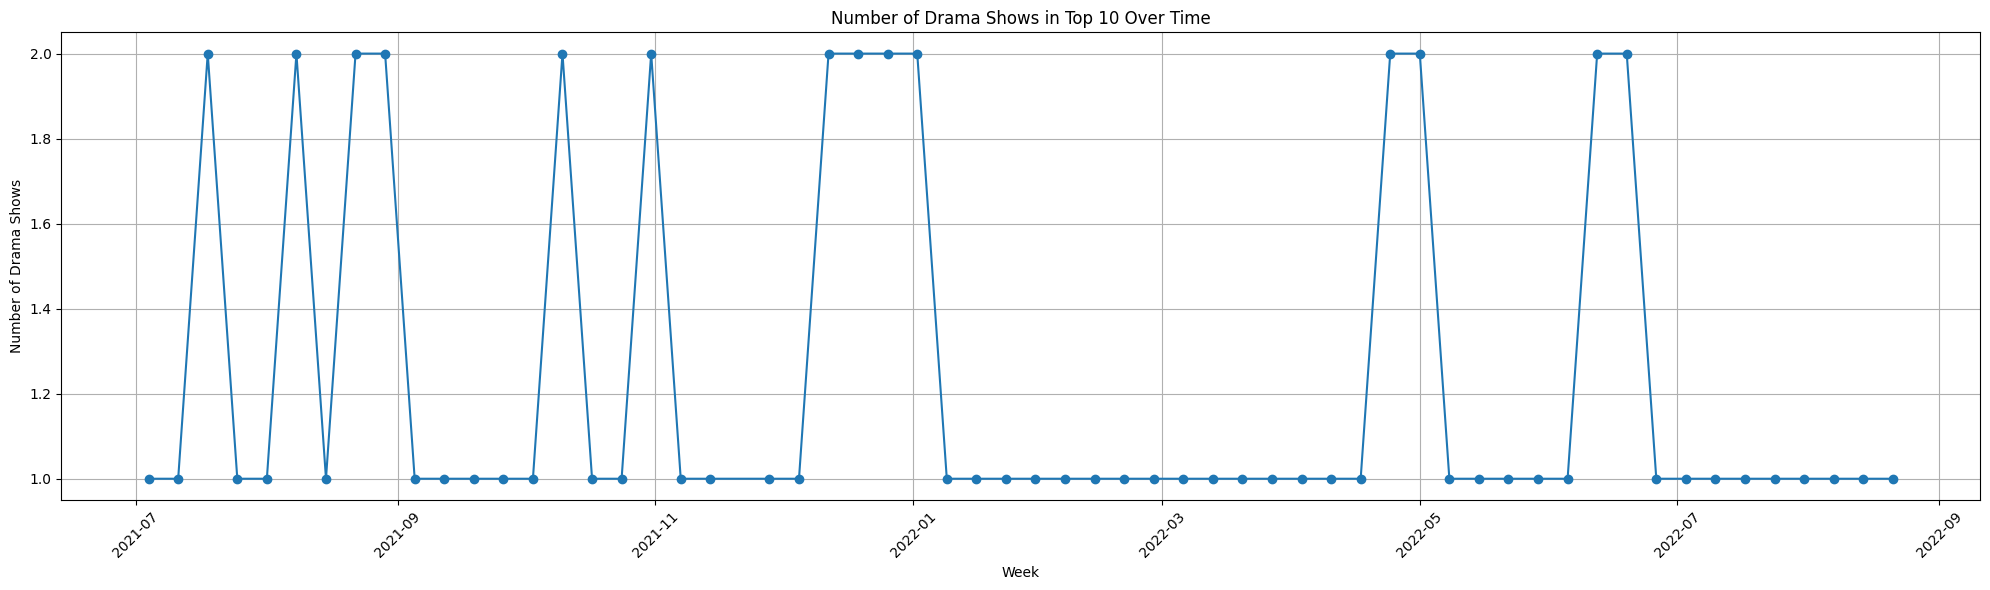

In [208]:


# Convert 'week' to datetime
new_netflix_data['week'] = pd.to_datetime(new_netflix_data['week'])

# Ensure 'genres' is a string representation of a list
new_netflix_data['genres'] = new_netflix_data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Filter for shows with 'Drama'
df_drama = new_netflix_data[new_netflix_data['genres'].apply(lambda x: 'Drama' in x)]

# Count the number of Drama shows per week
drama_weekly_counts = df_drama.groupby('week').size()

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(drama_weekly_counts.index, drama_weekly_counts.values, marker='o', linestyle='-')
plt.title('Number of Drama Shows in Top 10 Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Drama Shows')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
